# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

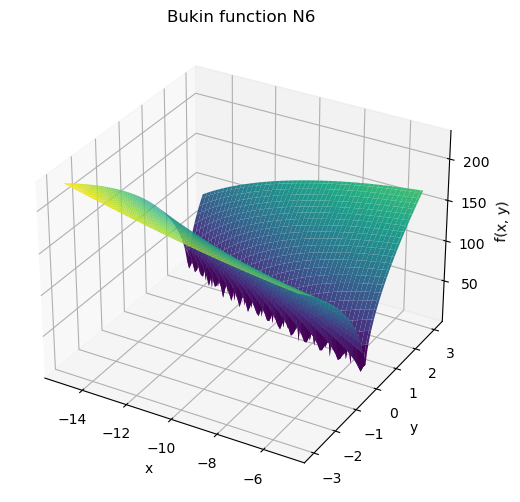

In [1]:
import numpy as np


def bukin_function(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x ** 2)) + 0.01 * np.abs(x + 10)


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = bukin_function(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Bukin function N6')

plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [1]:
import numpy as np

def bukin_function(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x ** 2)) + 0.01 * np.abs(x + 10)

def neighbor(state):
    x, y = state
    new_x = np.random.uniform(max(x - 1, -15), min(x + 1, 15))
    new_y = np.random.uniform(max(y - 0.1, -3), min(y + 0.1, 3))
    return new_x, new_y

def hill_climbing():
    #current_state = (-10,1)
    current_state = (np.random.uniform(-15,15), np.random.uniform(-3,3))  # Initial state -15<=x<=15 and -3<=y<=3
    current_value = bukin_function(*current_state)

    max_iterations = 1000
    iteration = 0

    while iteration < max_iterations:
        neighbor_state = neighbor(current_state)
        neighbor_value = bukin_function(*neighbor_state)

        if neighbor_value < current_value:
            current_state = neighbor_state
            current_value = neighbor_value

        iteration += 1

    return current_state, current_value


minimum_state, minimum_value = hill_climbing()

print("Minimum state:", minimum_state)
print("Minimum value:", minimum_value)



Minimum state: (7.200215343985491, 0.5179487653621386)
Minimum value: 2.368009064864301


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [38]:
import numpy as np

def knapsack_fitness(items, values, weights, capacity, selection):
    total_value = np.sum(selection * values)
    total_weight = np.sum(selection * weights)
    if total_weight > capacity:
        return -1  # infeasible solution
    else:
        return total_value

def hill_climbing_knapsack(items, values, weights, capacity, max_iter):
    n = len(items)
    current_selection = np.zeros(n, dtype=int)
    current_fitness = knapsack_fitness(items, values, weights, capacity, current_selection)

    def get_neighbors(selection):
        neighbors = []
        for i in range(n):
            neighbor = selection.copy()
            neighbor[i] = 1 - neighbor[i]
            neighbors.append(neighbor)
        return neighbors

    for i in range(max_iter):
        neighbors = get_neighbors(current_selection)
        neighbor_fitnesses = [knapsack_fitness(items, values, weights, capacity, neighbor) for neighbor in neighbors]
        best_neighbor_fitness = max(neighbor_fitnesses)
        if best_neighbor_fitness <= current_fitness:
            break  # we have reached a local maximum
        best_neighbor_index = neighbor_fitnesses.index(best_neighbor_fitness)
        current_selection = neighbors[best_neighbor_index]
        current_fitness = best_neighbor_fitness

    return current_selection, current_fitness

np.random.seed(0)
n = 10
capacity = 50
items = np.arange(n) + 1
values = np.random.randint(1, 10, n)
weights = np.random.randint(1, 10, n)

print("Items:", items)
print("Values:", values)
print("Weights:", weights)
print("Capacity:", capacity)

selection, fitness = hill_climbing_knapsack(items, values, weights, capacity, max_iter=1000)

print("Selected items:", items[selection.astype(bool)])
print("Total value:", fitness)

Items: [ 1  2  3  4  5  6  7  8  9 10]
Values: [6 1 4 4 8 4 6 3 5 8]
Weights: [7 9 9 2 7 8 8 9 2 6]
Capacity: 50
Selected items: [ 1  3  4  5  6  7  9 10]
Total value: 45



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  